<a href="https://colab.research.google.com/github/ricardoandreom/Monte-Carlo-simulation-stock-prices/blob/main/Monte_Carlo_Simulation_Tesla_Stock_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Monte Carlo Simulation - Apple Stock prices**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [ ]:
prices = pd.read_csv('/content/AAPL.csv')
prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-21,130.300003,132.410004,129.210007,132.300003,131.548447,79663300
1,2021-06-22,132.130005,134.080002,131.619995,133.979996,133.218903,74783600
2,2021-06-23,133.770004,134.320007,133.229996,133.699997,132.940475,60214200
3,2021-06-24,134.449997,134.639999,132.929993,133.410004,132.652130,68711000
4,2021-06-25,133.460007,133.889999,132.809998,133.110001,132.353851,70783700


In [ ]:
prices = prices['Close']

In [ ]:
returns = prices.pct_change()
last_price = prices[-1:]

In [ ]:
n_simulations = 100
n_days = len(prices)

simulation_df = pd.DataFrame()

for i in range(n_simulations):
  count = 0
  daily_vol = returns.std()
  
  series_price = []

  price = last_price * (1 + np.random.normal(0, daily_vol))
  series_price.append(price)

  for j in range(n_days):
    if count == n_days-1:
      break
    price = series_price[count] * (1 + np.random.normal(0, daily_vol))
    series_price.append(price)
    count += 1

  simulation_df[i] = series_price


In [ ]:
last_price

252    135.869995
Name: Close, dtype: float64

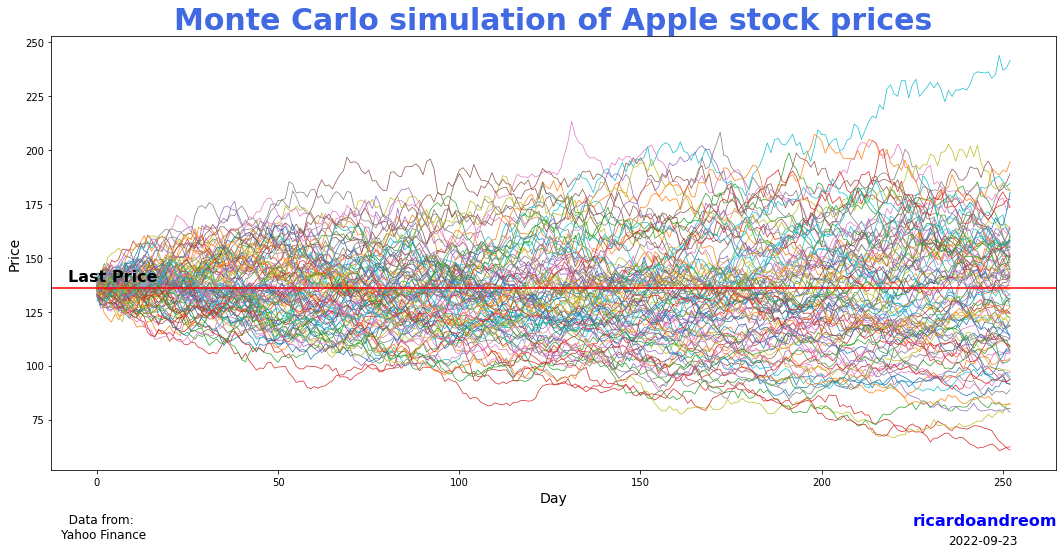

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Monte Carlo simulation of Apple stock prices',fontsize=30, fontweight='bold',color='royalblue')
plt.plot(simulation_df, linewidth = 0.7)
plt.axhline(y = 135.869995, color ='red', linestyle = '-')
plt.xlabel('Day',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.text(225,26,'ricardoandreom', fontsize=16,color='blue',fontweight='bold')
plt.text(-8,139,'Last Price',fontsize=16,fontweight='bold')
plt.text(-10, 20,'  Data from:\nYahoo Finance', fontsize=12)
plt.text(235, 17,datetime.today().strftime('%Y-%m-%d'), fontsize=12)
plt.savefig('montecarlo_simulation_apple.png',dpi=500,bbox_inches = 'tight')